In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [4]:
(xtrain,ytrain), (xtest,ytest)=mnist.load_data()

In [5]:
print(xtrain)
print(xtest.shape)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(10000, 28, 28)
(60000,)


In [5]:
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.

In [6]:
xtrain=xtrain.reshape((len(xtrain),28*28))
xtest=xtest.reshape((len(xtest),28*28))

In [7]:
inputdim=28*28

In [8]:
codedim=2

In [9]:
inputvec=Input(shape=(inputdim,))

In [10]:
enc1=Dense(392,activation='sigmoid') (inputvec)
enc2=Dense(196,activation='sigmoid') (enc1)
enc3=Dense(98,activation='sigmoid') (enc2)

In [11]:
encode=Dense(codedim,activation='tanh') (enc3)

In [12]:
dc1=Dense(196,activation='sigmoid') (encode)
dc2=Dense(196,activation='sigmoid') (dc1)
dc3=Dense(392,activation='sigmoid') (dc2)
decoderout=Dense(inputdim,activation='sigmoid') (dc3)

In [13]:
latentvec=Model(inputvec,encode)
autoencoder=Model(inputvec,decoderout)

In [14]:
print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_2 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 198       
_________________________________________________________________
dense_4 (Dense)              (None, 196)               588       
_________________________________________________________________
dense_5 (Dense)              (None, 196)               3861

In [14]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
hist=autoencoder.fit(xtrain,xtrain,epochs=100,batch_size=500,shuffle=True,validation_data=(xtest,xtest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2851 - val_loss: 0.2630
Epoch 2/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2632 - val_loss: 0.2630
Epoch 3/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2632 - val_loss: 0.2630
Epoch 4/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2632 - val_loss: 0.2628
Epoch 5/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2631 - val_loss: 0.2621
Epoch 6/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2484 - val_loss: 0.2407
Epoch 7/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2388 - val_loss: 0.2362
Epoch 8/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2353 - val_loss: 0.2327
Epoch 9/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.23

Epoch 76/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1674 - val_loss: 0.1715
Epoch 77/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1673 - val_loss: 0.1717
Epoch 78/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1670 - val_loss: 0.1714
Epoch 79/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1671 - val_loss: 0.1718
Epoch 80/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1668 - val_loss: 0.1713
Epoch 81/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1666 - val_loss: 0.1711
Epoch 82/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1666 - val_loss: 0.1711
Epoch 83/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1663 - val_loss: 0.1710
Epoch 84/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1662 - val_loss: 0.1709
Epoch 85/100
60000/

In [16]:
ytest[1]

2

In [17]:
encd=latentvec.predict(xtest, use_multiprocessing=True)

In [18]:
ytest[:]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

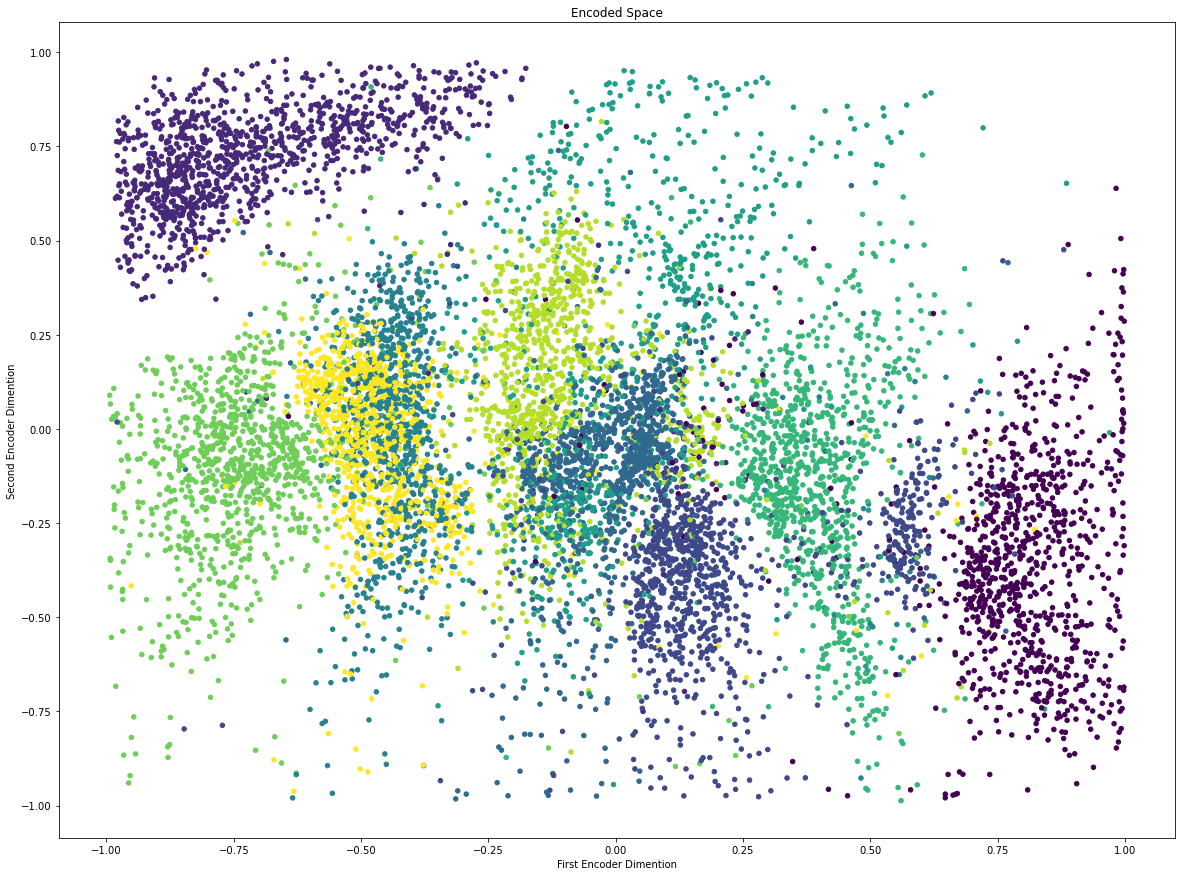

In [19]:
#Visualize latest space
fig=plt.figure(figsize=(20,15))
plt.scatter(encd[:,0],encd[:,1],20,c=ytest[:], cmap='viridis')
plt.title('Encoded Space')
plt.ylabel('Second Encoder Dimention')
plt.xlabel('First Encoder Dimention')
plt.show()

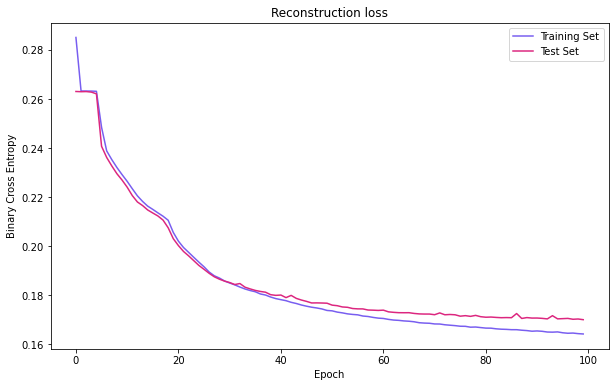

In [20]:
#Visualize loss
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],color='#785ef0')
plt.plot(hist.history['val_loss'],color='#dc267f')
plt.title('Reconstruction loss')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Set','Test Set'],loc='upper right')
plt.show()

In [21]:
reconstructed=autoencoder.predict(xtest)

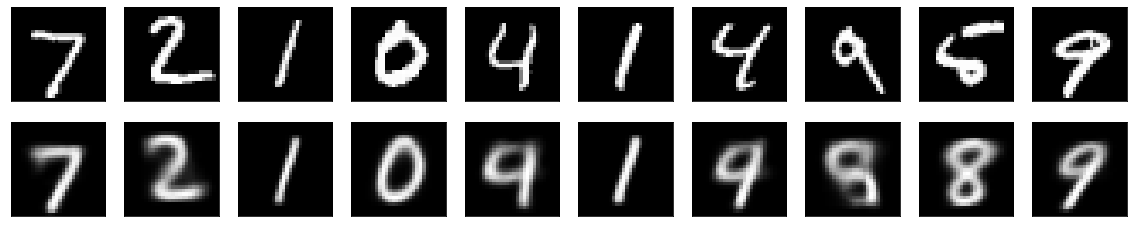

In [22]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [ ]:
print(mnist)